# Stochastic Gradient Descent Lab Exercises

In this laboratory session, we will investigate the various characteristics associated with Stochastic Gradient Descent, as elucidated in the instructional lectures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from functools import partial

from sklearn.datasets import make_classification

In [2]:
import ipywidgets as widgets
import os
from numpy.linalg import norm
from IPython import display
import matplotlib.ticker as tck
from mpl_toolkits.mplot3d import axes3d

## Lab Exercise I: Stochastic Gradient Descent with Uniform Sampling on two-dimensional function

$$
f(x, y) = \frac12 (f_1(x_1, x_2) + f_2(x_1, x_2)),
$$
where 
$$
f_1(x_1, x_2) = a (x_1-c)^2 + b (x_2-d)^2, \ \ f_2(x_1, x_2) = a (x_1+c)^2 + b (x_2+d)^2.
$$

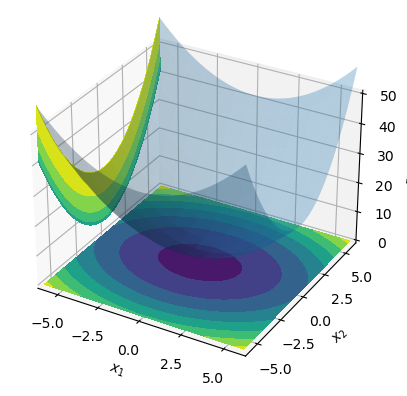

In [3]:
a = 0.5
b = 1
c = 1
d = 2

f = lambda x1, x2: a*x1**2 + b*x2**2 + c ** 2 + d ** 2
grad_f = lambda x1, x2: np.array([2*a*x1, 2*b*x2])
hess_f = [2*a, 2*b] #in this case hessian is the diagonal matrix

ax = plt.figure().add_subplot(projection='3d')
xmin, xmax = -6,6

zmin, zmax = 0,40
grid = np.linspace(xmin, xmax, 100)
X,Y = np.meshgrid(grid, grid)
Z = np.array([[f(x1,x2)  for x1 in grid]  for x2 in grid] )

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

#ax.plot_wireframe(X, Y, z_ar[i], label=label_ar[i], color=color_ar[i])

ax.contourf(X, Y, Z, zdir='z', offset=zmin, cmap="viridis")
ax.contourf(X, Y, Z, zdir='x', offset=xmin, cmap="viridis")
ax.contourf(X, Y, Z, zdir='y', offset=zmax, cmap="viridis")
size = 15
plt.rcParams['xtick.labelsize'] = size
plt.rcParams['ytick.labelsize'] = size
plt.rcParams['legend.fontsize'] = size
plt.rcParams['axes.titlesize'] = size
plt.rcParams['axes.labelsize'] = size
plt.rcParams["figure.figsize"] = [10,10]
ax.set(xlim=(xmin, xmax), ylim=(xmin, xmax), zlim=(0, 50),
       xlabel=r'$x_1$', ylabel=r'$x_2$', zlabel=r'$f(x_1,x_2)$')


plt.show()

In [4]:
def stochastic_gradient_descent(func, func_grad, stochastic_grad, random_generator, w0, stepsize, Nsteps=100):
    """ Compute stochastic gradient descent iteration statistics for small dimensional problem """
    w_ar = np.zeros ((Nsteps, 2),dtype=float)
    df_ar = np.zeros ((Nsteps, 2), dtype=float)
    func_ar = np.zeros (Nsteps, dtype=float)
    w_ar[0,:] = w0.copy()
    func_ar[0] = func(w0[0],w0[1])
    df_ar[0,:] = func_grad(w0[0], w0[1]).copy()

    w = w0.copy()
    stoch_indices = random_generator.integers(low=0, high=1, endpoint=True, size=Nsteps)
    for i in range(1, Nsteps):
        w = w - stepsize * stochastic_grad(w[0], w[1], stoch_indices[i])
        w_ar[i,:] = w.copy()
        df_ar[i,:] = func_grad(w[0], w[1])
        func_ar[i] = func(w[0], w[1])

    return w_ar, func_ar, df_ar

In [5]:
def interactive_plot(nsteps):
    rng = np.random.default_rng()
    
    a = 0.5
    b = 1
    c = 1
    d = 2

    f = lambda x1, x2: a*x1**2 + b*x2**2 + c ** 2 + d ** 2
    grad_f = lambda x1, x2: np.array([2*a*x1, 2*b*x2])
    stoch_grad_f = lambda x1, x2, ind: \
        np.array([2 * a * (x1 - c), 2 * b * (x2 - d)]) if ind == 0 else np.array([2 * a * (x1 + c), 2 * b * (x2 + d)])

    L = max(2*a,2*b)

    constant_step_size = 0.5 / L

    w1_0 = 5
    w2_0 = 5

    x1_min = x2_min = -6
    x1_max = x2_max = 6
    x1_ar = np.linspace(x1_min, x1_max, 100)
    x2_ar = np.linspace(x2_min, x2_max, 100)
    f_ar = np.array([ np.array([f(w1_, w2_) for w1_ in x1_ar]) for w2_ in x2_ar])
    grad_f_ar = np.array( [ np.array([np.linalg.norm(grad_f(w1_, w2_)) for w1_ in x1_ar]) for w2_ in x2_ar])

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,7))

    #plt.rcParams["figure.figsize"] = [50,20]
    #fig.canvas.tooalbar_visible = False
    fig.canvas.header_visible = False
    #fig.canvas.footer_visible = False
    c1 = ax1.contourf(x1_ar, x2_ar, f_ar, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title(r'$f(x)$')

    c2 = ax2.contourf(x1_ar, x2_ar, grad_f_ar, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title(r'$\||\nabla f(x)\||$')
    #fig.set_size_inches(24, 10)

    ws, fs, grad_fs = stochastic_gradient_descent(f, grad_f, stoch_grad_f, rng, np.array([w1_0, w2_0]), \
                                                       stepsize=constant_step_size, Nsteps=nsteps+1)

    ax1.plot([0],[0],'*',ms = 20, color="orange", label='solution', markeredgecolor="black")
    ax2.plot([0],[0],'*',ms = 20, color="orange", label='solution', markeredgecolor="black")


    ax1.set_xlabel(r'$x_1$')
    ax1.set_ylabel(r'$x_2$')
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylabel(r'$x_2$')

    print(f'After {nsteps} iterarions GD stopped in [{round(ws[-1, 0], 3),round(ws[-1, 1], 3)}] with function value  f = {round(f(ws[-1, 0], ws[-1, 1]), 3)} ')

    ax1.plot(ws[:,0], ws[:,1], 'ro-',label='GD')
    ax2.plot(ws[:,0], ws[:,1], 'ro-', label='GD')

    ax1.plot([w1_0],[w2_0],'^',ms = 20, color="white", label=r'$x^0$',markeredgecolor="black")
    ax2.plot([w1_0],[w2_0],'^',ms = 20, color="white", label=r'$x^0$',markeredgecolor="black")

    ax1.legend()
    ax2.legend()
    size = 20
    plt.rcParams['xtick.labelsize'] = size  # 40
    plt.rcParams['ytick.labelsize'] = size  # 40
    plt.rcParams['legend.fontsize'] = size  # 30
    plt.rcParams['axes.titlesize'] = size  # 40
    plt.rcParams['axes.labelsize'] = size  # 40s

    #fig.suptitle(f'Gradient with constant stepsize; {nsteps} steps; stepsize = {round(constant_step_size, 4)}')

    plt.show()

    #FuncAnimation(f, update, frames=range(nsteps), interval=120,init_func=init, blit=True)

### Tasks
1. Change only the stepsize of the algorithm and describe what happens when increasing/decreasing its magnitude (by factors of 2, 5, 10, your choice?)
2. Reset the stepsize to its initial value, and change now constants $a$ and $b$ -- look at cases when the ratio $\frac{a}{b}$ equals 1, 10, 100, and 1000. What changes in the algorithm's behaviour and why?
3. Reset $a$ and $b$ to initial values and change now values $c$ and $d$. What happens when decreasing both to nearly zero? What happends when increasing both to large values (say, around 10)? Why?

In [6]:
# @title
widgets.interactive(interactive_plot, nsteps=widgets.IntSlider(min=0, max=200, value=0, step=1))

interactive(children=(IntSlider(value=0, description='nsteps', max=200), Output()), _dom_classes=('widget-inte…

# Logistic Regression

Let's now turn our attention to the problem of ridge logistic regression:
$$
\min_{x \in \mathbb{R}^d} \left\{f(x) =  \frac{1}{n} \sum_{i=1}^n \log\left\{1 + \exp{\left(-b_i\langle a_i, x\rangle\right)}\right\} + \frac{\lambda}{2} \|x\|^2\right\},
$$
where $b_i \in \{-1, 1\}$ signifies the label of the $i$-th datapoint, and $a_i \in \mathbb{R}^d$ denotes the feature vector of the $i$-th datapoint.

## Dataset Generation

The dataset is generated utilizing the [sklearn.datasets.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function. Execute the following two cells and take note of the clear separation achieved among the data points.

In [7]:
np.random.seed(42)
n = 100
d = 5

data_matrix, labels = make_classification(n_samples = n, n_features=d, n_redundant=0, n_informative=3, class_sep = 3.0, n_clusters_per_class=1)
labels = 2*labels - 1

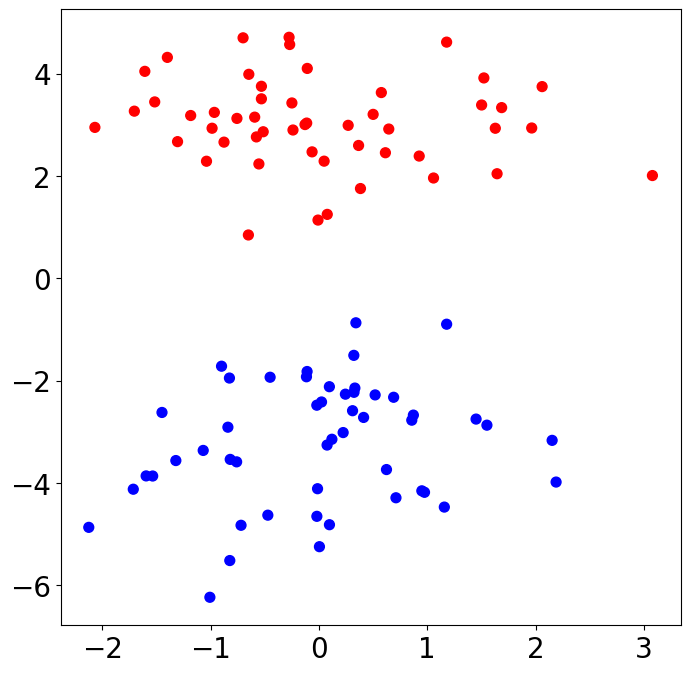

In [8]:
plt.figure(figsize=(8, 8))

plt.scatter(data_matrix[:, 1], data_matrix[:, 2], marker="o", c=labels, s=50, edgecolors="face", cmap="bwr")
plt.show()

## Implementation of the Objective Function and its Gradient

Let us revisit the objective function of this exercise:
$$
\min_{x \in \mathbb{R}^d} \left\{f(x) = \frac{1}{n}\sum_{i=1}^n f_i(x) \right\},
$$
where each individual function $f_i$ is defined as follows:
$$
f_i(x) = \log\left\{1 + \exp{\left(-b_i\langle a_i, x\rangle\right)}\right\} + \frac{\lambda}{2} \|x\|^2.
$$

The gradient of $f_i$ can be computed via the formula:
$$
\nabla f_i(x) = - \frac{1}{1 + \exp{\left(b_i\langle a_i, x\rangle\right)}} b_i a_i + \lambda x.
$$

Now, let us apply our knowledge of NumPy. Implement the individual function using NumPy functions.

In [9]:
def individual_log_loss(weights, features, label, regularizer):
  """ Calculate the ridge logistic loss function """
  # Replace pass with your code
  pass

In [10]:
def individual_log_loss_grad(weights, features, label, regularizer):
  """ Calculate the ridge logistic loss gradient """

  # Replace pass with your code
  pass

In [11]:
# def log_loss_by_ind(weights, reg, index):
#   """ Calculate the ridge logistic loss for the i-th datapoint """
#   return individual_log_loss(weights, data_matrix[i], labels[i], reg)

# def log_loss_grad_by_ind(weights, reg, index):
#   """ Calculate the ridge logistic loss gradient for the i-th datapoint  """
#   return individual_log_loss_grad(weights, data_matrix[i], labels[i], reg)

In [12]:
def log_loss(weights, data_matrix, labels, regularizer):
  """ Calculate the ridge logistic loss for all datapoints """

  log_loss_vector = np.log(1. + np.exp(- labels[:, None] * (data_matrix @ weights)))
  log_loss = log_loss_vector.mean()

  return log_loss + regularizer * np.linalg.norm(weights, 2) ** 2 / 2

In [13]:
def log_loss_grad(weights, data_matrix, labels, regularizer):
  """ Calculate the ridge logistic loss gradient """

  label_by_features = labels[:, None] * data_matrix

  scalers = - 1. / (1 + np.exp(label_by_features @ weights))

  first_part = (scalers[:, None] * label_by_features).mean(axis=0)
  second_part = regularizer * weights

  return first_part + second_part

In [14]:
x_0 = np.ones(5)
reg = 1.
log_loss_grad(x_0, data_matrix, labels, reg)

array([1.09114028, 1.07138862, 0.66019325, 0.96872002, 1.08810603])

## Obtaining a Solution using Gradient Descent

We employ a standard Gradient Descent approach to obtain the minimizer of the objective function. This solution will be essential for the purpose of performance comparison.

In [15]:
def gradient_descent(data_matrix, labels, regularizer, start_iterate, stepsize, num_iterations):
  """ Run Gradient Descent """
  x = np.copy(start_iterate)
  loss_values = [log_loss(x, data_matrix, labels, regularizer)]

  for _ in range(num_iterations):
    # replace x = None with the gradient descent step 
    x = None
    loss_values.append(log_loss(x, data_matrix, labels, regularizer))

  return x, loss_values

## Computing Important Constants

Throughout this exercise, we will need to use smoothness constant of both the main objective function $f$ and individual objective functions $f_i$. We first note that the smoothness constant of $f_i$ can be defined as follows:
$$
L_i = \frac{1}{4} \|a_i\|^2 + \lambda
$$
(Optional) Exercise 1. Prove that this constant, indeed, is a smoothness constant for $f_i$.

In the same manner, one can also show that smoothness constant for the objective function $f$ can be obtained as follows:
$$
L = \left\|\frac{1}{4n} \textbf{A}_i^\top \textbf{A}_i + \lambda \textbf{I}_d \right\|,
$$
where $\textbf{A} = \begin{bmatrix} a_1^\top \\ \dots \\ a_n^\top \end{bmatrix}$ is the feature matrix and $\textbf{I}_d$ is an identity matrix of size $d$.

(Optional) Exercise 2. Prove the formula provides a smoothness constant for $f$.

In the next cells, we compute these constants.

In [16]:
def constants(data_matrix, regularizer):
  """ Compute smoothness constants """
  individual_smoothness_constants = []
  for i in range(data_matrix.shape[0]):
    individual_smoothness_constant = 0.25 * np.linalg.norm(data_matrix[i], 2) ** 2 + regularizer
    individual_smoothness_constants.append(individual_smoothness_constant)

  n, d = data_matrix.shape
  objective_function_smoothness_constant = np.linalg.norm(data_matrix.transpose() @ data_matrix / (4 * n) + regularizer * np.eye(d))

  return np.array(individual_smoothness_constants), objective_function_smoothness_constant

In [17]:
L_is, L = constants(data_matrix, reg)

Text(0.5, 1.0, 'Distribution of constants $L_i$ across different datapoints')

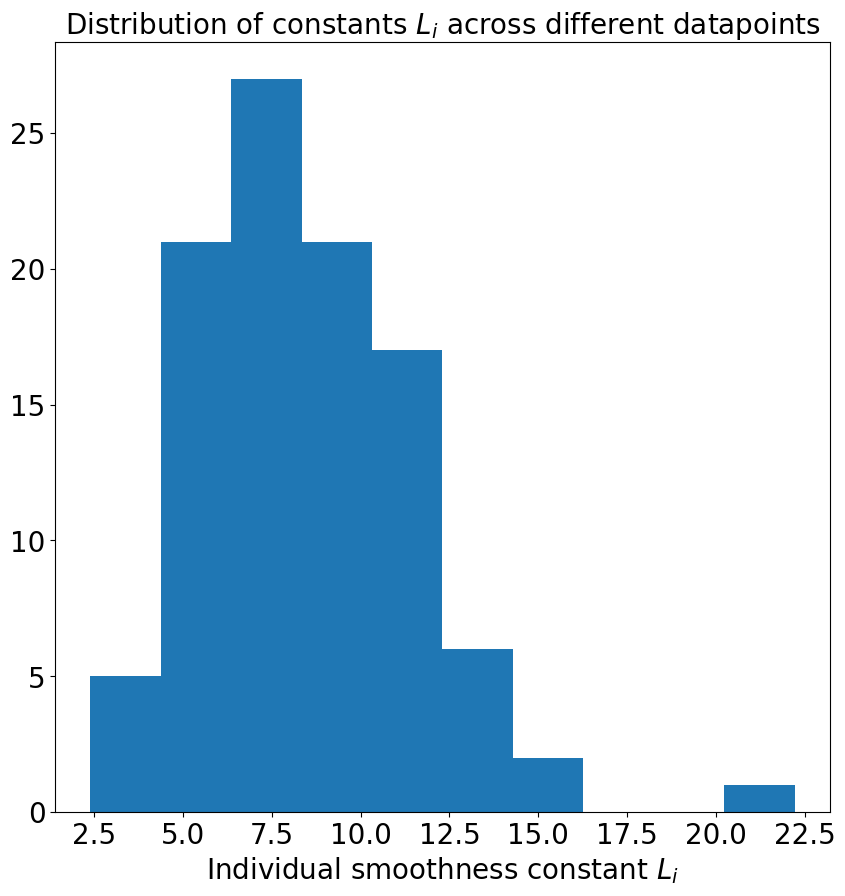

In [18]:
plt.hist(L_is)
plt.xlabel(r'Individual smoothness constant $L_i$')
plt.title(r'Distribution of constants $L_i$ across different datapoints')

In [19]:
print('Smoothness constant of the main objective equals', round(L, 1))

Smoothness constant of the main objective equals 6.7


Now we are ready to compute the minimizer of $f$ with Gradient Descent.

In [24]:
data_matrix.shape

(100, 5)

In [20]:
# x_0 = np.ones(d)
# stepsize = 1. / L
# num_iterations = 100

# x_solution, loss_values = gradient_descent(data_matrix, labels, reg, x_0, stepsize, num_iterations)

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [21]:
plt.plot(loss_values)
plt.yscale('log')
plt.xlabel(r'Iteration $t$')
plt.ylabel(r'$f(x^t)$')
plt.xlim(left=0, right=num_iterations)
# plt.ylim(bottom=0)
plt.title('Gradient Descent on Ridge Logistic Regression')
plt.grid(which='both')
plt.show()

NameError: name 'loss_values' is not defined

## Lab Exercise II: Stochastic Gradient Descent with Uniform Sampling launched with different stepsizes

In the first exercise, we are going to verify that the stepsize of SGD affects the size of the neigbourhood. Let us start with implementating SGD.

In [ ]:
def SGD(data_matrix, labels, regularizer, x_solution, x_0, num_iterations, stepsize, p):
  """ Run Stochastic Gradient Descent for the sampling strategy 'p' """
  rng = np.random.default_rng()
  indices = rng.choice(data_matrix.shape[0], num_iterations, p=p)

  dist_values = [np.linalg.norm(x_0 - x_solution, 2) ** 2]
  x = np.copy(x_0)

  for t in range(num_iterations):
    i = indices[t]
    # replace x = None with the stochastic gradient descent step; use that i is chosen at random between 0, 1, ..., n
    x = None
    dist_values.append(np.linalg.norm(x - x_solution, 2) ** 2)

  return dist_values

Stochastic Gradient Descent with Uniform Sampling can be understood as a specific scenario within the broader context of Stochastic Gradient Descent. In this scenario, each data point is sampled with an equal probability of $\frac{1}{n}$.

In [ ]:
p_uniform = np.ones(n) / n
p_uniform[:5]

In [ ]:
SGD_US = partial(SGD, p=p_uniform)

In [ ]:
print('The largest stepsize for SGD-US allowed by theory is', round(.5 / np.max(L_is), 3))

In this experiment, we are going to run Stochastic Gradient Descent with Uniform Sampling with 3 different stepsizes: 0.0003, 0.003, 0.3. Let us revisit the main theorem of the lecture. It states that if $f$ is $\mu$-convex, and each $f_i$ is convex and $L_i$-smooth, then SGD with stepsize $0 < \gamma \leq \frac{1}{2A''}$, where $A'' = max_i \frac{L_i}{n p_i}$, satisfies
$$
\mathbb{E} \|x^k - x^\ast \|^2 \leq (1 - \gamma \mu)^k\|x^0 - x^\ast\|^2 + \frac{2 \gamma \sigma_\ast^2}{\mu},
$$
where $\sigma_\ast^2 = \mathbb{E}\|g(x^\ast)\|^2 - \|\mathbb{E} g(x^\ast) \|^2$.

(Optional) Exercise 3. Verify that utilized functions in this lab exercise satisfy all the requirements of the theorem.

One notable implication of the theorem is observation that, although larger stepsize leads to faster convergence (the first element in the right-hand side converges faster to zero), it converges to the larger neigbourhood (the second element in the right-hand side grows linearly with $\gamma$). Let us verify this fact on practice.

In [ ]:
x_0 = np.ones(d)
num_iterations = 30000

stepsizes = [3e-4, 3e-3, 3e-2]

distances_list = []
for stepsize in stepsizes:
  distances = SGD_US(data_matrix, labels, reg, x_solution, x_0, num_iterations, stepsize)
  distances_list.append(distances)

In [ ]:
for ind, stepsize in enumerate(stepsizes):
  plt.plot(distances_list[ind], label=r'$\gamma=$' + str(stepsize))

# plt.plot(distances, label='small stepsize')
# plt.plot(distances_2, label='large stepsize')
plt.yscale('log')
plt.xticks(ticks=np.arange(stop=num_iterations + 1, step=num_iterations / 10), labels=np.arange(stop=num_iterations // 1000 + 1, step=num_iterations // 10000))
plt.xlabel(r'Iteration $t$, $10^3$')
plt.ylabel(r'$\|x^t - x^\ast\|^2$')
plt.xlim(left=0, right=num_iterations)
plt.grid()
plt.title('SGD-US launched with different stepsizes')
plt.legend()

What does the plot show?

## Lab Exercise III: Uniform vs. Importance Sampling

In this exercise, we are going to explore three different sampling strategies: uniform and importance.

In [ ]:
p_importance = L_is / L_is.sum()

In [ ]:
def stepsize(L_is, p):
  return 0.5 * L_is.size / np.max(L_is / p)

In [ ]:
stepsize_importance = stepsize(L_is, p_importance)
stepsize_importance

In [ ]:
stepsize_uniform = stepsize(L_is, p_uniform)
stepsize_uniform

In [ ]:
num_iterations = 1000
x_0 = np.ones(d)

distances_uniform = SGD(data_matrix, labels, reg, x_solution, x_0, num_iterations, stepsize_uniform, p_uniform)
distances_importance = SGD(data_matrix, labels, reg, x_solution, x_0, num_iterations, stepsize_importance, p_importance)

In [ ]:
plt.plot(distances_uniform, label='uniform')
plt.plot(distances_importance, label='importance')
plt.legend()
plt.yscale('log')
plt.xlim(left=0, right=num_iterations)
plt.xlabel('Iteration t')
plt.ylabel(r'$\|x^t - x^\ast\|^2$')
plt.title('SGD-US vs. SGD-IS')
plt.grid()

How would you interpret the plot? Why?

## Lab Exercise IV: SGD with Minibatch Sampling

In [ ]:
import sklearn.datasets
import urllib.request
w8a_url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/bodyfat_scale"
data_path = './bodyfat_scale'
f = urllib.request.urlretrieve(w8a_url, data_path)
# f = urllib.request.urlretrieve(a9a_url, data_path)
A, b = sklearn.datasets.load_svmlight_file(data_path)

A = np.array(A.todense())
n = A.shape[0]
d = A.shape[1]
lambda_reg = 1/n
mu = np.min(np.linalg.eigvalsh(A.T @ A / n)) + lambda_reg
L = np.max(np.linalg.eigvalsh(A.T @ A / n)) + lambda_reg
L_i = np.diag(A @ A.T) + lambda_reg

x_star = np.linalg.inv(A.T @ A + n * lambda_reg * np.eye(d)) @ A.T @ b

$$\frac{1}{2n}\|Ax-b\|^2+\frac{\lambda}{2}\|x\|^2$$

In [ ]:
def grad(x, idx):
    return A[idx].T @ (A[idx] @ x - b[idx]) / len(idx) + lambda_reg * x

In [ ]:
def grad_us(x):
    idx = np.random.choice(list(range(n)), size = 1, replace=False)
    return grad(x, idx)

In [ ]:
def grad_is(x):
    idx = np.random.choice(list(range(n)), size = 1, replace=False, p=L_i / np.sum(L_i)) 
    return grad(x, idx)

In [ ]:
def grad_full(x):
    idx = np.random.choice(list(range(n)), size = n, replace=False)
    return grad(x, idx)

In [ ]:
np.sort(np.random.choice(list(range(n)), size = n//2, replace=False))

In [ ]:
def grad_nice(x, tau):
    idx = np.random.choice(list(range(n)), size = tau, replace=False) 
    return grad(x, idx)

In [ ]:
sigma_star_sqr = (np.sum([np.linalg.norm(grad(x_star, [i])) ** 2 for i in range(n)]) / n)

In [ ]:
sigma_star_sqr

In [ ]:
def sgd(x_0, tau, eps, flag, max_iter = 10000000):
    A=(n-tau)/tau /(n-1)*np.max(L_i)+n*(tau -1)/tau /(n-1)*L
    if tau < n:
        var_g_star = (n-tau)/tau /(n-1)* sigma_star_sqr
        
        if flag == True:
            gamma = np.min([0.5 / A, 0.25 * mu * eps / var_g_star])
        else:
            gamma = 0.5 / A
            
    else:
        gamma = 0.5 / A
    
    x_k = np.copy(x_0)
    
    plot_y = [np.linalg.norm(x_k - x_star) ** 2]
    plot_x = [0]
    num_iter = -1
    for k in range(int(max_iter)):
        x_k -= gamma * grad_nice(x_k, tau)
        plot_y.append(np.linalg.norm(x_k - x_star) ** 2 )
        plot_x.append(plot_x[-1] + tau)
        if flag == True and plot_y[-1] < eps:
            num_iter = plot_x[-1]
            break;
                
    return num_iter, plot_x, plot_y

In [ ]:
x_0 = np.zeros(d)
flag = False

In [ ]:
max_comm = 200000

In [ ]:
tau1 = 1
eps = 0.000001
num_iter1, plot_x1, plot_y1 = sgd(x_0, tau1, eps, flag, max_iter = max_comm)

In [ ]:
tau50 = 50
num_iter50, plot_x50, plot_y50 = sgd(x_0, tau50, eps, flag, max_iter = max_comm/tau50)

In [ ]:
tau100 = 100
num_iter100, plot_x100, plot_y100 = sgd(x_0, tau100, eps, flag, max_iter = max_comm/tau100)

In [ ]:
taufull = n
num_iterfull, plot_xfull, plot_yfull = sgd(x_0, taufull, eps, flag, max_iter = max_comm/taufull)

In [ ]:
plt.yscale('log')
# plt.title('$\\epsilon={},\\tau^*={}$'.format(eps, int(tau_star)))
x_0 = np.zeros(d)


plt.plot(plot_x1, plot_y1, label = '$\\tau$ = {}'.format(tau1))
plt.plot(plot_x50, plot_y50, label = '$\\tau$ = {}'.format(tau50))
plt.plot(plot_x100, plot_y100, label = '$\\tau$ = {}'.format(tau100))
plt.plot(plot_xfull, plot_yfull, label = '$\\tau$ = {}'.format(taufull))
plt.ylim(eps, 2*np.linalg.norm(x_0 - x_star) ** 2)
plt.title('Stochastic Gradient Descent with Minibatch sampling')
plt.xlim(left=0, right = max_comm)
plt.grid()
plt.legend()
plt.xlabel(r'number of gradient calls, units of $10^3$')
plt.xticks(np.arange(start=0, stop=max_comm + 1, step=25000), np.arange(start=0, stop=int(max_comm / 1000) + 1, step=25))
plt.ylabel(r'$\|x^t - x^\ast\|^2$')